# Testing Jacobian Regularization on MNIST using LeNet

### Imports and Data Loading

In [1]:
import torch
import jupyter_black
from torchsummary import summary

from data_generators import data_loader_MNIST
from model_classes import LeNet_MNIST
from tools import train
from plotting_tools import (
    plot_results,
    plot_reg_results,
    plot_activations_pca,
    plot_decision_boundary,
    plot_and_print_img,
    generate_random_vectors,
    get_random_img,
)

jupyter_black.load()

In [2]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Loading MNIST dataset
in_channels = 1
train_loader, test_loader = data_loader_MNIST()
summary_model = LeNet_MNIST(lr=0.01, momentum=0.9, in_channels=in_channels).to(device)
summary(summary_model, (in_channels, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 24, 24]           156
├─MaxPool2d: 1-2                         [-1, 6, 12, 12]           --
├─Conv2d: 1-3                            [-1, 16, 8, 8]            2,416
├─MaxPool2d: 1-4                         [-1, 16, 4, 4]            --
├─Linear: 1-5                            [-1, 120]                 30,840
├─Dropout: 1-6                           [-1, 120]                 --
├─Linear: 1-7                            [-1, 84]                  10,164
├─Dropout: 1-8                           [-1, 84]                  --
├─Linear: 1-9                            [-1, 10]                  850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
Total mult-adds (M): 0.28
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.17
Estimated Total Size (MB): 0.21


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 24, 24]           156
├─MaxPool2d: 1-2                         [-1, 6, 12, 12]           --
├─Conv2d: 1-3                            [-1, 16, 8, 8]            2,416
├─MaxPool2d: 1-4                         [-1, 16, 4, 4]            --
├─Linear: 1-5                            [-1, 120]                 30,840
├─Dropout: 1-6                           [-1, 120]                 --
├─Linear: 1-7                            [-1, 84]                  10,164
├─Dropout: 1-8                           [-1, 84]                  --
├─Linear: 1-9                            [-1, 10]                  850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
Total mult-adds (M): 0.28
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.17
Estimated Total Size (MB): 0.21

In [4]:
# Hyperparameters
lr = 0.01
momentum = 0.9
l2_lmbd = 0.0001
jacobi_reg_lmbd = 0.001

### No regularization

#### Training

In [5]:
model_no_reg = LeNet_MNIST(lr=lr, momentum=momentum, in_channels=in_channels).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model_no_reg, device, n_epochs
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1


 20%|██        | 1/5 [00:36<02:27, 36.77s/it]

Accuracy of the network on the test images: 96 %
Epoch: 2


 40%|████      | 2/5 [01:08<01:41, 33.70s/it]

Accuracy of the network on the test images: 97 %
Epoch: 3


 60%|██████    | 3/5 [01:43<01:08, 34.22s/it]

Accuracy of the network on the test images: 98 %
Epoch: 4


 80%|████████  | 4/5 [02:16<00:34, 34.02s/it]

Accuracy of the network on the test images: 98 %
Epoch: 5


100%|██████████| 5/5 [02:51<00:00, 34.39s/it]

Accuracy of the network on the test images: 98 %


#### Visualization

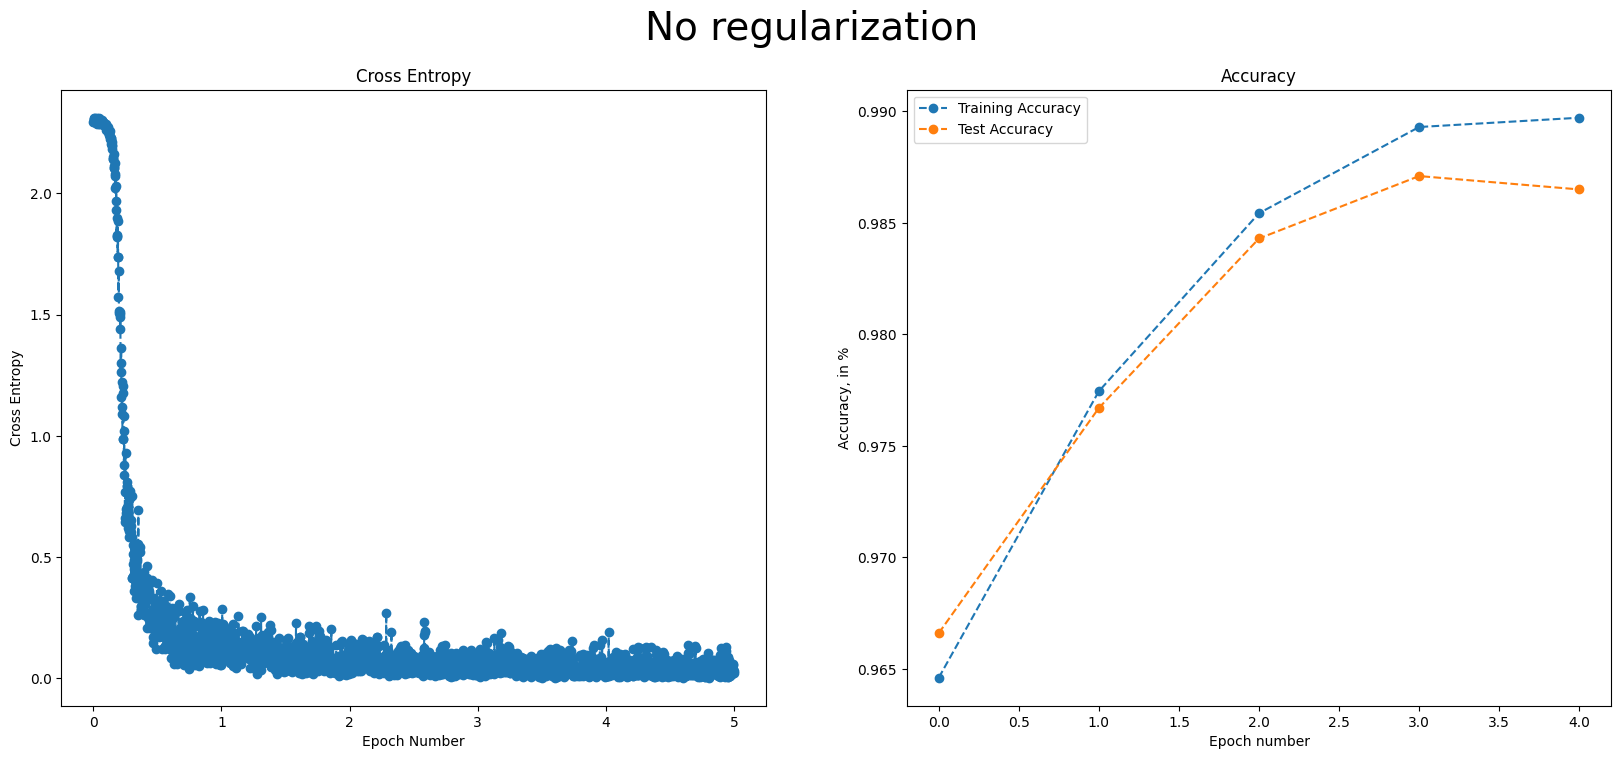

In [6]:
plot_results(
    epochs, losses, train_accuracies, test_accuracies, title="No regularization"
)

In [7]:
# plot_activations_pca(model_no_reg, train_loader, device)

Prediction with no regularization: 6


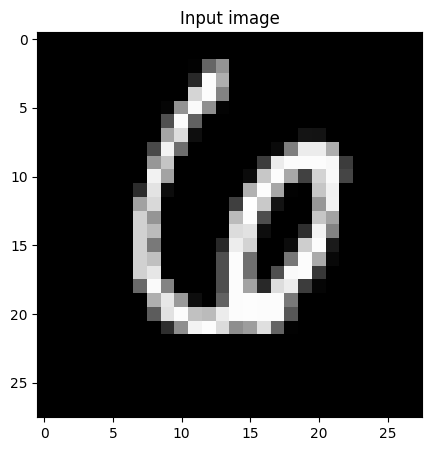

c:\Users\aslak\.conda\envs\jacreg\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


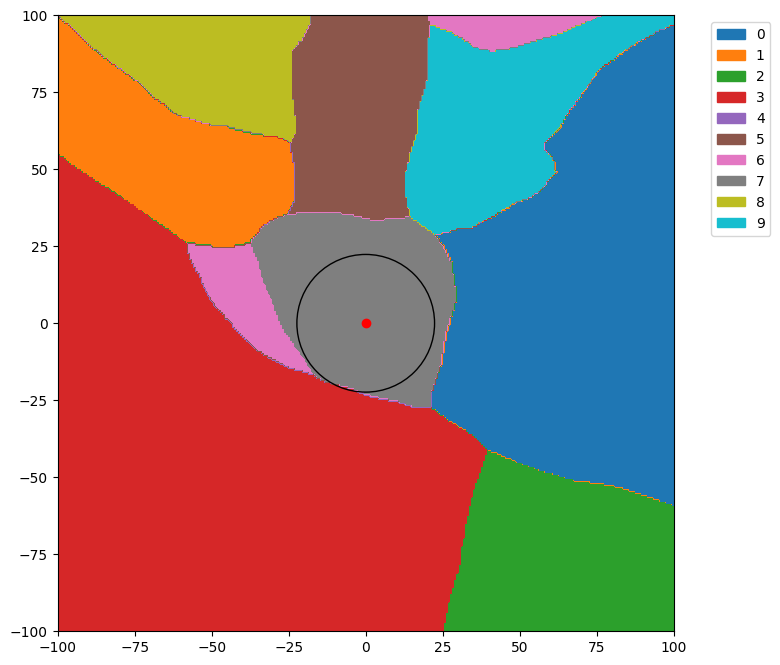

In [8]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(image, model_no_reg, device, "no regularization")
plot_decision_boundary(model_no_reg, image, v1, v2, device)

### L2 Regularization

#### Training

In [9]:
model_l2 = LeNet_MNIST(
    lr=lr, momentum=momentum, in_channels=in_channels, l2=True, l2_lmbd=l2_lmbd
).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model_l2, device, n_epochs
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1


 20%|██        | 1/5 [00:36<02:27, 36.83s/it]

Accuracy of the network on the test images: 96 %
Epoch: 2


 40%|████      | 2/5 [01:17<01:56, 38.83s/it]

Accuracy of the network on the test images: 97 %
Epoch: 3


 60%|██████    | 3/5 [01:55<01:17, 38.62s/it]

Accuracy of the network on the test images: 98 %
Epoch: 4


 80%|████████  | 4/5 [02:31<00:37, 37.76s/it]

Accuracy of the network on the test images: 98 %
Epoch: 5


100%|██████████| 5/5 [03:09<00:00, 37.87s/it]

Accuracy of the network on the test images: 98 %


#### Visualization

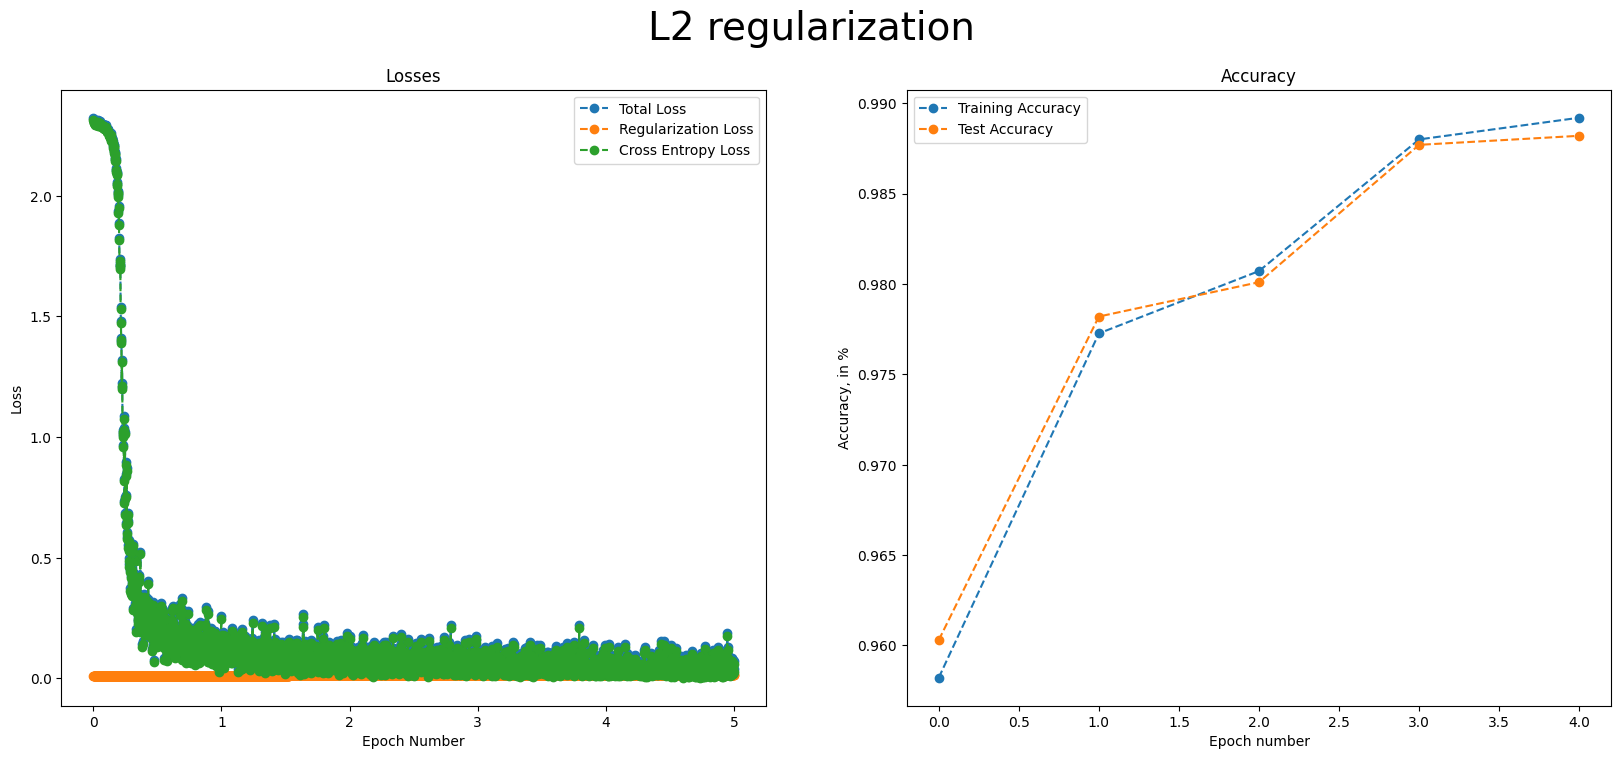

In [10]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="L2 regularization",
)

In [11]:
# plot_activations_pca(model_l2, train_loader, device)

Prediction with L2 regularization: 1


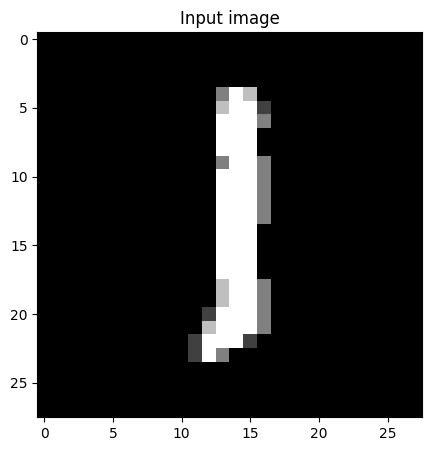

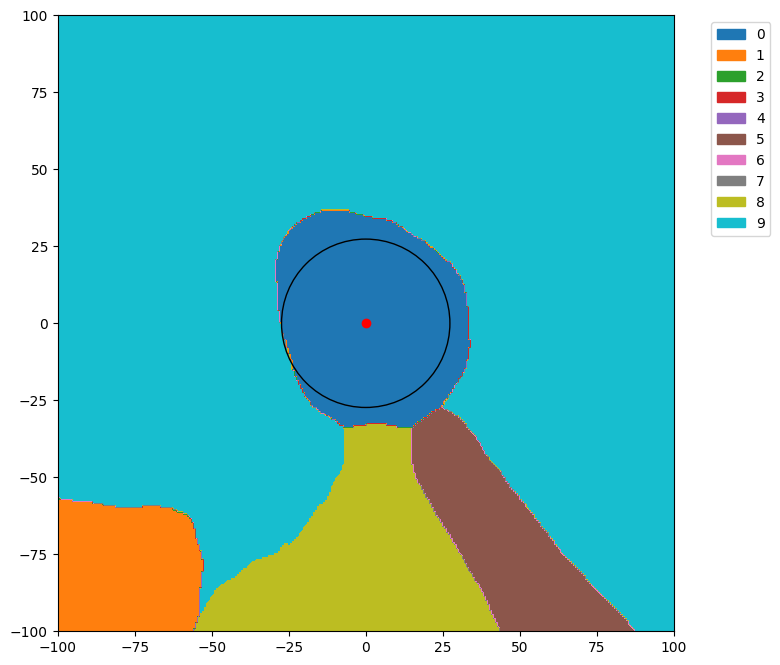

In [12]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(image, model_l2, device, "L2 regularization")
plot_decision_boundary(model_l2, image, v1, v2, device)

### Jacobi Regularization

### Training

In [13]:
model_jacobi = LeNet_MNIST(
    lr=lr,
    momentum=momentum,
    in_channels=in_channels,
    jacobi_reg=True,
    jacobi_reg_lmbd=jacobi_reg_lmbd,
).to(device)
n_epochs = 5
losses, reg_losses, epochs, weights, train_accuracies, test_accuracies = train(
    train_loader, test_loader, model_jacobi, device, n_epochs
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1


 20%|██        | 1/5 [00:50<03:23, 50.89s/it]

Accuracy of the network on the test images: 96 %
Epoch: 2


 40%|████      | 2/5 [01:38<02:26, 48.75s/it]

Accuracy of the network on the test images: 97 %
Epoch: 3


 60%|██████    | 3/5 [02:24<01:35, 47.50s/it]

Accuracy of the network on the test images: 98 %
Epoch: 4


 80%|████████  | 4/5 [03:12<00:47, 47.90s/it]

Accuracy of the network on the test images: 98 %
Epoch: 5


100%|██████████| 5/5 [03:56<00:00, 47.27s/it]

Accuracy of the network on the test images: 98 %


#### Visualization

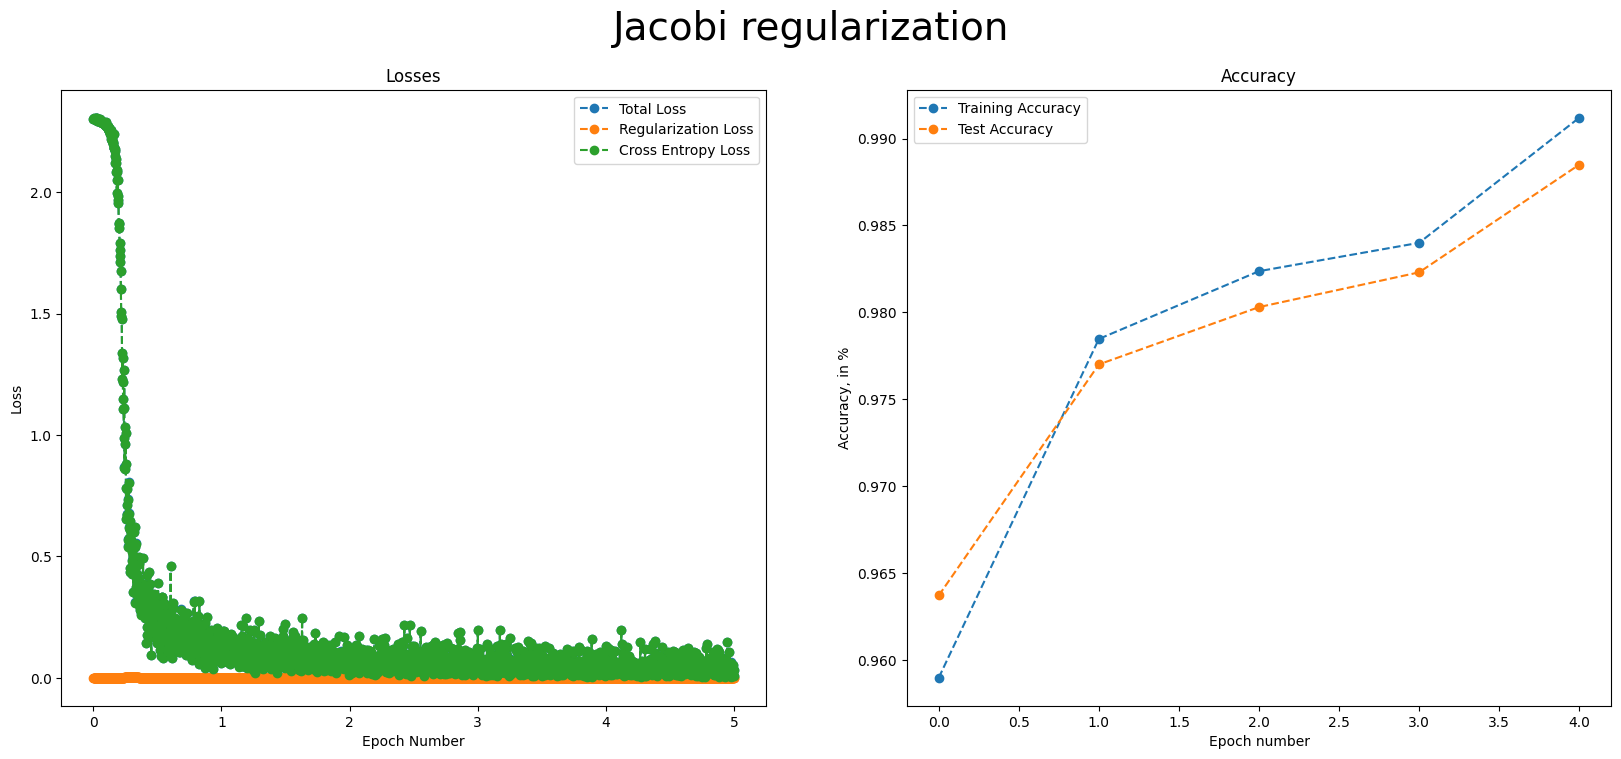

In [14]:
plot_reg_results(
    epochs,
    losses,
    reg_losses,
    train_accuracies,
    test_accuracies,
    title="Jacobi regularization",
)

In [15]:
# plot_activations_pca(model_jacobi, train_loader, device)

Prediction with Jacobi regularization: 0


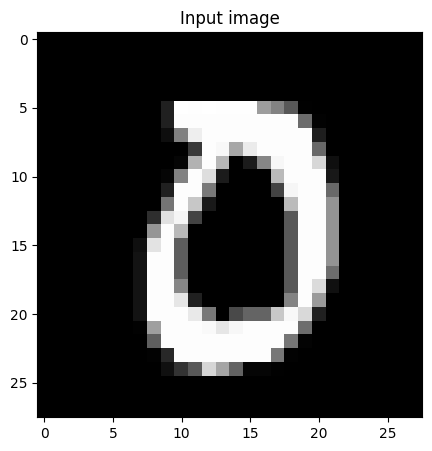

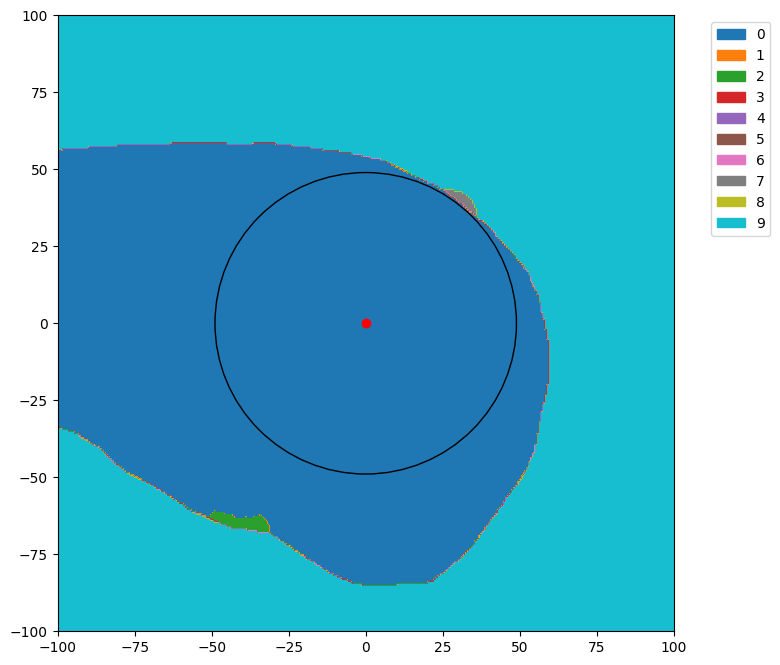

In [16]:
image = get_random_img(test_loader)
v1, v2 = generate_random_vectors(image)
plot_and_print_img(image, model_jacobi, device, "Jacobi regularization")
plot_decision_boundary(model_jacobi, image, v1, v2, device)